In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import torch

from torchinfo import summary
from networks.model import DenseDepth

/home/iasl_server/miniconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = DenseDepth(encoder_model="mobilevitv2")

ckpt = torch.load("/home/model_disk/DenseDepth/0508-1826/027-mobilevitv2-3.8249720118955763.pt", map_location=torch.device('cuda'))
model.load_state_dict(ckpt["model"])
model.eval().to("cuda")

DenseDepth(
  (encoder): Encoder(
    (model): ByobNet(
      (stem): ConvNormAct(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
      )
      (stages): Sequential(
        (0): Sequential(
          (0): BottleneckBlock(
            (conv1_1x1): ConvNormAct(
              (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn): BatchNormAct2d(
                128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
                (drop): Identity()
                (act): SiLU(inplace=True)
              )
            )
            (conv2_kxk): ConvNormAct(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=128, bias=False)
              (bn): BatchNormAct2d(
           

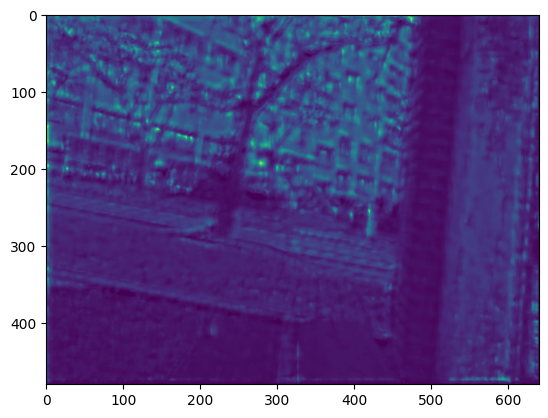

In [5]:
image = cv2.imread("/home/iasl_server/project/test/1_rgb.png")
image = cv2.resize(image, (640, 480))
image = image.transpose(2, 0, 1)
image = torch.from_numpy(image).unsqueeze(0).float().cuda()

with torch.no_grad():
    pred = model(image)
    pred = pred.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(pred)

In [6]:
pred[400, 600]

38.779972